In [8]:
import numpy as np
import math
import g2o
import matplotlib.pyplot as plot


In [9]:
solver = g2o.BlockSolverSE3(g2o.LinearSolverEigenSE3())
solver = g2o.OptimizationAlgorithmLevenberg(solver)


optimizer = g2o.SparseOptimizer()
optimizer.set_algorithm(solver)
optimizer.set_verbose(True)

#optimizer.load("/home/eshahrivar/Downloads/g2o_old/g2o/trunk/data/2d/intel/intel.g2o")
optimizer.load("/home/eshahrivar/SLAM/lsslam_framework/octave/data.g2o")

print('num vertices:', len(optimizer.vertices()))
print('num edges:', len(optimizer.edges()), end='\n\n')

num vertices: 3873
num edges: 17605



In [10]:
v = optimizer.vertices()
edge = optimizer.edges()

print(v[1].estimate().translation()[0])

print(v[1].estimate().rotation().angle())

0.00088
0.01153


<IPython.core.display.Javascript object>


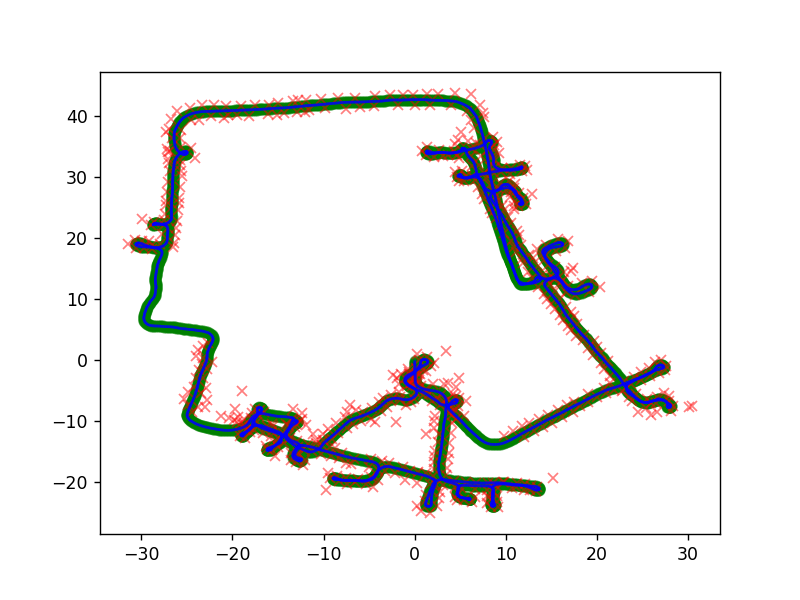

In [11]:
poses = np.array([0,0]) #dummy
posesXY = np.array([0,0]) #dummy


for k in v.keys():
    if type(v[k]) == g2o.VertexSE2:
        pose = [v[k].estimate().translation()[0], v[k].estimate().translation()[1]]
        poses = np.vstack((poses, pose))
    elif type(v[k]) == g2o.VertexPointXY:
        pose = [v[k].estimate()[0], v[k].estimate()[1]]
        posesXY = np.vstack((posesXY, pose))
        
%matplotlib notebook

#plot.figure()
plot.plot(poses[1:, 0], poses[1:, 1], 'o', label="Original", alpha=0.5, color="green")

plot.plot(posesXY[1:, 0], posesXY[1:, 1], 'x', label="Original", alpha=0.5, color="red")


for e in edge:
    if type(e) == g2o.EdgeSE2:
        plot.plot([e.vertex(0).estimate().translation()[0], e.vertex(1).estimate().translation()[0]], [e.vertex(0).estimate().translation()[1], e.vertex(1).estimate().translation()[1]], alpha=0.5, color="blue")
    #elif type(e) == g2o.EdgeSE2PointXY:
    #    plot.plot([e.vertex(0).estimate()[0], e.vertex(1).estimate()[0]], [e.vertex(0).estimate()[1], e.vertex(1).estimate()[1]], alpha=0.5, color="black")


In [12]:
#Using the python interface was not successful and often leds to the program crashing. 
#So I used the cpp simple optimizer code 
#to complete the optimization and save the result the out.g2o

In [15]:
optimizer = g2o.SparseOptimizer()
optimizer.load("/home/eshahrivar/g2o/bin/out.g2o")
v = optimizer.vertices()
edge = optimizer.edges()

<IPython.core.display.Javascript object>


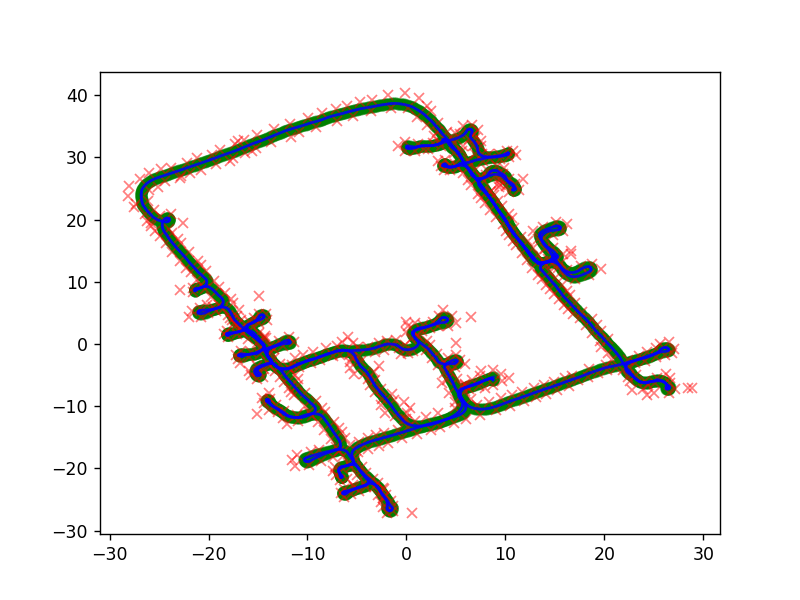

In [16]:
poses = np.array([0,0]) #dummy
posesXY = np.array([0,0]) #dummy


for k in v.keys():
    if type(v[k]) == g2o.VertexSE2:
        pose = [v[k].estimate().translation()[0], v[k].estimate().translation()[1]]
        poses = np.vstack((poses, pose))
    elif type(v[k]) == g2o.VertexPointXY:
        pose = [v[k].estimate()[0], v[k].estimate()[1]]
        posesXY = np.vstack((posesXY, pose))
        
%matplotlib notebook

#plot.figure()
plot.plot(poses[1:, 0], poses[1:, 1], 'o', label="Original", alpha=0.5, color="green")

plot.plot(posesXY[1:, 0], posesXY[1:, 1], 'x', label="Original", alpha=0.5, color="red")


for e in edge:
    if type(e) == g2o.EdgeSE2:
        plot.plot([e.vertex(0).estimate().translation()[0], e.vertex(1).estimate().translation()[0]], [e.vertex(0).estimate().translation()[1], e.vertex(1).estimate().translation()[1]], alpha=0.5, color="blue")
    #elif type(e) == g2o.EdgeSE2PointXY:
    #    plot.plot([e.vertex(0).estimate()[0], e.vertex(1).estimate()[0]], [e.vertex(0).estimate()[1], e.vertex(1).estimate()[1]], alpha=0.5, color="black")